# Análisis de Optimización de Marketing: Proyecto Showz
**Autor:** [Tu Nombre] | **Rol:** Data Analyst

## 🎯 Objetivo del Proyecto
El objetivo principal es optimizar los gastos de marketing de la plataforma **Showz**. Mediante el análisis de datos históricos de visitas, pedidos y gastos, busco responder:
1. ¿Cómo interactúan los usuarios con el producto (Engagement)?
2. ¿Cuándo empiezan a comprar y cuál es su fidelidad (Retención)?
3. ¿Cuál es la rentabilidad real (ROMI) de cada canal de adquisición?

## 🛠️ Herramientas Utilizadas
* **Python:** Pandas, NumPy (Procesamiento de datos).
* **Visualización:** Matplotlib, Seaborn (Visualización de métricas clave).
* **Análisis:** Cohort Analysis, LTV, CAC y ROMI.

# Contexto del proyecto #
Al realizar practicas en el departamento de analítica de **"Showz"** una empresa dedicada a ventas para entradas de eventos, contamos con:

-  Registros del servidor con datos sobra las visitas a "Showz" desde enero de 2017 hasta diciembre 2018.
-  Un archivo con los pedidos en este período.
-  Estadística de gastos de marketing


Se dividirá en etapas
 1. Acceder a datos y prepárarlos para el análisis
 2. Elaborar informes y obtener métricas de visitas, ventas y marketing
 3. Conclusión de hallazgos encontrados, retroalimentar a departamento de marketing


## *Importar librerías a utilizar* ##

In [40]:
# Importando librerias
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Configuración estética profesional de gráficos
plt.style.use('seaborn-v0_8-whitegrid') # Estilo limpio
sns.set_palette("viridis") # Paleta de colores profesional
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

## Etapa 1. Acceder a datos y prepararlos para el análisis ##

Para el análisis se accederan a tres registros:
1. **Tabla de visitas** con registros del servidor con datos sobre las visitas al sitio web
2. **Tabla de ordenes** con registros sobre pedidos realizados
3. **Tabla de costos** con gastos de marketing registrados

In [41]:
#Cargando set de datos
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

In [42]:
# Análisis exploratorio de dataset "visits"
visits.info()
visits.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [43]:
# Análisis exploratorio de dataset orders
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [44]:
# Análisis exploratorio de dataset costs
costs.info()
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Descripción de datos ###

Se identifica que los contenidos de los datasets estan organizados de la siguiente manera:

**Tabla visits**
- *Device*: Dispositivo del usuario
- *End Ts*: Fecha y hora de término de la sesión
- *Source Id*: Identificador de la fuente de anuncios de la que proviene el usuario
- *Start Ts*: Fecha y hora de inicio de la sesión
- *Uid*: Identificador unico del usuario

**Tabla orders**
- *BuyTs*: Fecha y hora del pedido
- *Revenue*: El ingreso de Showz por el pedido
- *Uid*: Identificador único del usuario que realiza un pedido

**Tabla costs**
- *source_id*: Identificador de la fuente de anuncios
- *dt*: Fecha
- *costs*: Gastos en esta fuente de anuncios en este día

***Observaciones a datasets***
- Se observa que las fechas no estan identificadas con categoría apropiada.
- Se identifica que nombres de columnas contienenes mayusculas y espacios.


In [45]:
# Modificando dataset "visits"
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
# Confirmando cambios
visits.dtypes

Device               object
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object

In [46]:
# Modificando dataset "orders"
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
# Confirmando cambios
orders.dtypes

Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

In [47]:
# Modificando dataset "costs"
costs['dt'] = pd.to_datetime(costs['dt'])
# Confirmando cambios
costs.dtypes

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object

In [48]:
# Función para estandarización de nombres de columnas con minusculas y sin espacios
def estandarizar_columnas(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
    return df

# Aplicacion de función en cada dataframe
visits = estandarizar_columnas(visits)
orders = estandarizar_columnas(orders)
costs = estandarizar_columnas(costs)

# Confirmando cambios
print(visits.columns)
print(orders.columns)
print(costs.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')


## 🧹 Preprocesamiento y Limpieza
* **Conversión de Tipos:** Se transformaron las columnas de tiempo a objetos `datetime` para análisis temporal.
* **Normalización:** Los nombres de las columnas fueron convertidos a minúsculas y estandarizados para evitar errores de sintaxis.
* **Verificación:** Se validó la ausencia de valores nulos críticos y duplicados en las tablas de eventos.

## Etapa 2. Elaboración de informes y obtención de métricas ##


A continuación se manipulará la información contenida en esta tabla para obtener frecuencia de visitas al día, semana y mes, así como el promedio de sesiones al día por usuario y su duración, finalmente obtendremos la frecuencia con la que regresan los usuarios.

#### *Métricas DAU, WAU, MAU* ####

In [49]:
# Generación de columnas para agrupar datos por semana, mes y fecha
visits['session_date'] = visits['start_ts'].dt.date
visits['session_day'] = visits['start_ts'].dt.day
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_month'] = visits['start_ts'].dt.month
visits['session_year'] = visits['start_ts'].dt.isocalendar().year

# Calculo de métricas DAU, WAU, MAU
dau_visits = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_visits = visits.groupby(['session_year','session_week']).agg({'uid': 'nunique'}).mean()
mau_visits = visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'}).mean()

# Impresión de resultados
print("Usuarios diarios activos (DAU) promedio:", int(dau_visits))
print("Usuarios semanalmente activos (WAU) promedio:", int(wau_visits))
print("Usuarios mensualmente activos (MAU) promedio: ", int(mau_visits))

Usuarios diarios activos (DAU) promedio: 907
Usuarios semanalmente activos (WAU) promedio: 5716
Usuarios mensualmente activos (MAU) promedio:  23228


C:\Users\cacre\AppData\Local\Temp\ipykernel_22348\582207517.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Usuarios diarios activos (DAU) promedio:", int(dau_visits))
C:\Users\cacre\AppData\Local\Temp\ipykernel_22348\582207517.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Usuarios semanalmente activos (WAU) promedio:", int(wau_visits))
C:\Users\cacre\AppData\Local\Temp\ipykernel_22348\582207517.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Usuarios mensualmente activos (MAU) promedio: ", int(mau_visits))


*Observaciones*

El negocio mantiene una base de usuarios activa con un promedio de 907 usuarios diarios (DAU), 5,716 usuarios semanales (WAU) y 23,228 usuarios mensuales (MAU). La relación entre estas métricas es crucial: con un WAU de aproximadamente 6.3 veces el DAU (5716 / 907) y un MAU de cerca de 4.1 veces el WAU (23228 / 5716), se observa que una parte significativa de los usuarios no interactúa diariamente, pero regresa semanal o mensualmente. Esto indica una buena base de usuarios recurrentes en ciclos de uso más amplios que el diario, lo que es un buen indicio de valor a largo plazo y una base estable para estrategias de retención.

#### *Sesiones por día* ####

In [50]:
# Copiando dataset para manipulación y adecuación de indicador
sessions_per_user_day = visits.copy()

#Configurando fechas para grafico
sessions_per_user_day['session_year'] = sessions_per_user_day['start_ts'].dt.year
sessions_per_user_day = sessions_per_user_day.rename(columns = {'session_year':'year', 'session_month':'month','session_day':'day'})
sessions_per_user_day['date'] = pd.to_datetime(sessions_per_user_day[['year','month','day']])

#Sesiones por día, agrupando por día y calculando número de sesiones y usuarios únicos
sessions_per_user_day = sessions_per_user_day.groupby(['year','month','day']).agg({'uid':['count','nunique']})

#Renombrando columnas
sessions_per_user_day.columns = ['n_sessions','n_users']

# Calculando sesiones por usuario
sessions_per_user_day['sessions_per_user'] = sessions_per_user_day['n_sessions'] / sessions_per_user_day['n_users']
sessions_per_user_day = sessions_per_user_day.reset_index()

# Mostrando resultado
print('Número de sesiones por día:')
print(sessions_per_user_day['sessions_per_user'].describe())

Número de sesiones por día:
count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sessions_per_user, dtype: float64


## 📈 2.1. Análisis de Producto (Engagement)
En esta sección evaluamos la actividad de los usuarios. Es fundamental entender si nuestra plataforma retiene el interés diario y qué dispositivos prefieren nuestros clientes más valiosos.

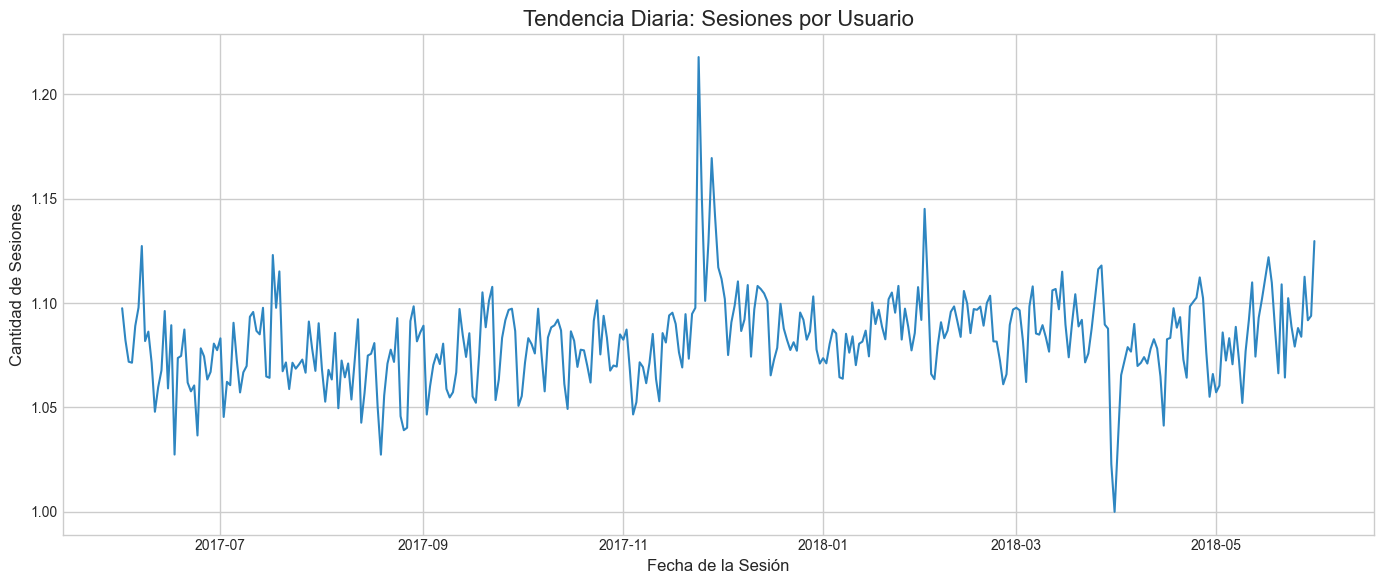

In [51]:
#Generando columna de fecha para el gráfico
sessions_per_user_day['date'] = pd.to_datetime(sessions_per_user_day[['year','month','day']])
sessions_per_user_day = sessions_per_user_day.sort_values('date')

# Gráfico: Sesiones por Usuario por Día
plt.figure(figsize=(14, 6))
plt.plot(sessions_per_user_day['date'], sessions_per_user_day['sessions_per_user'], 
         linestyle='-', color='#2E86C1', linewidth=1.5)
plt.title('Tendencia Diaria: Sesiones por Usuario')
plt.xlabel('Fecha de la Sesión')
plt.ylabel('Cantidad de Sesiones')
plt.tight_layout()
plt.show()

*Observaciones*

El promedio de 1.08 sesiones por usuario por día, con una desviación estándar baja de 0.02, indica una alta consistencia en la actividad diaria de los usuarios, quienes, en su mayoría, realizan una única sesión por día o muy pocas sesiones adicionales. El gráfico temporal refuerza esta estabilidad, mostrando que, a pesar de picos ocasionales (notablemente a finales de 2017), la métrica se mantiene consistentemente entre 1.05 y 1.10 sesiones por usuario, lo que sugiere una base de usuarios con hábitos de uso predecibles y enfocados en tareas específicas por sesión, en lugar de múltiples interacciones dispersas a lo largo del día.

#### *Duración de sesiones* ####

In [52]:
#Calculando duración de cada sesión
visits['session_duration_min'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()/60

# Estadisticas Generales
print(visits['session_duration_min'].describe())


count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_min, dtype: float64


*Observaciones*

Al realizar calculo de la metrica, se detectan valores negativos, lo cual se considera atipico, una sesion no puede terminar antes de empezar, se procede a filtrar las sesiones con duración negativa y aquellas que excedan de 180 minutos

In [53]:
# Filtrando sesiones con duración negativa y duración atípica
visits_clean = visits[(visits['session_duration_min']>=0)&(visits['session_duration_min']<=180)]

# Revisando estadísticas
print(visits_clean['session_duration_min'].describe())

# Agrupando por fecha y calculando duración promedio por día
daily_duration = visits_clean.groupby('session_date')['session_duration_min'].mean().reset_index()
print(daily_duration)

count    359140.000000
mean         10.544843
std          15.163069
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         180.000000
Name: session_duration_min, dtype: float64
    session_date  session_duration_min
0     2017-06-01             11.105346
1     2017-06-02              9.936961
2     2017-06-03             10.115968
3     2017-06-04              9.238497
4     2017-06-05             10.407503
..           ...                   ...
359   2018-05-27              9.282738
360   2018-05-28              9.957777
361   2018-05-29             10.270438
362   2018-05-30             10.480222
363   2018-05-31             12.147161

[364 rows x 2 columns]


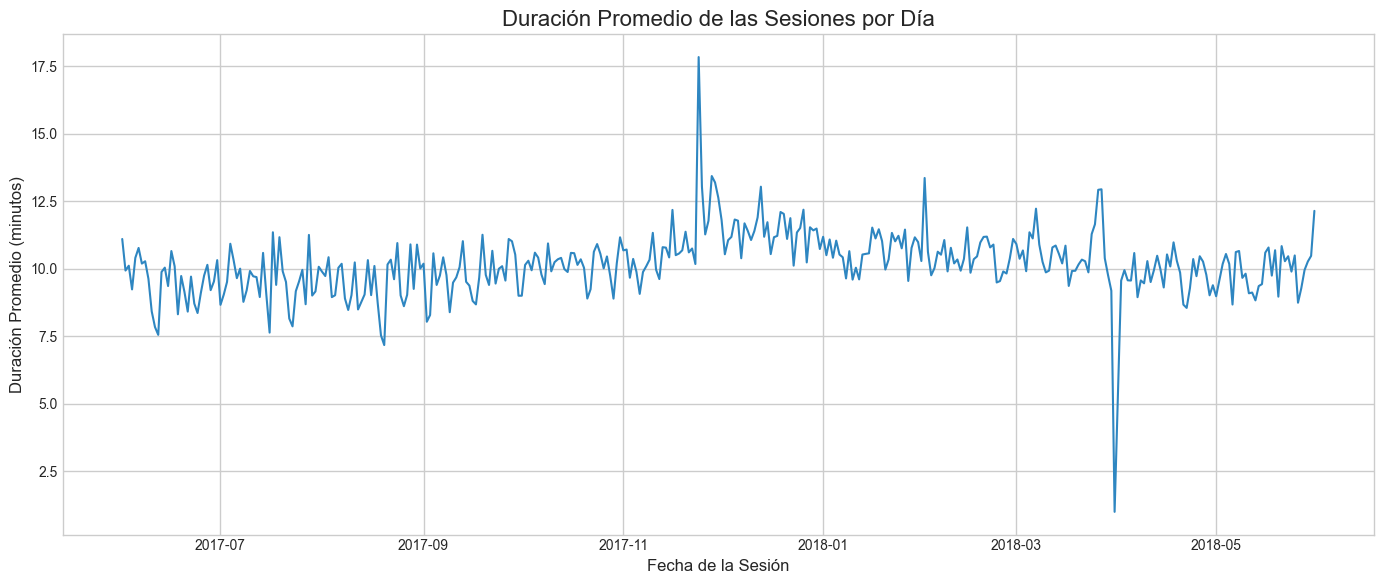

In [54]:
# Gráfico: Duración promedio
plt.figure(figsize=(14, 6))
plt.plot(daily_duration['session_date'], daily_duration['session_duration_min'], color='#2E86C1')
plt.title('Duración Promedio de las Sesiones por Día')
plt.xlabel('Fecha de la Sesión')
plt.ylabel('Duración Promedio (minutos)')
plt.tight_layout()
plt.show()

*Observaciones*

El usuario dura en promedio, 10 minutos y medio en una sesión en el portal de la tienda. Solo se detectan dos comportamientos distintos al rango (7.5 min a 13 min), en el mes de diciembre y en el mes de abril, siendo el primero más alto, ya que el promedio de una sesión en ese mes llego a los 17.5 minutos, en tanto en abril el comportamiento fue a la baja con menos de 2.5 minutos en promedio por sesión. 

#### *Frecuencia de retorno de usuarios* ####

In [55]:
# Generando cohortes mensuales
# Agrupando tabla por columna 'uid' para obtener primera visita de cliente
first_user_visit = visits.groupby('uid')['start_ts'].min()
# Nombrando columna
first_user_visit.name = 'first_visit_date'
# Uniendo con dataframe visits
visits = visits.join(first_user_visit, on='uid')

# Convirtiendo fechas a 'datetime64['M']
visits['first_visit_month'] = visits['first_visit_date'].dt.to_period('M').dt.to_timestamp()
visits['visit_month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()

# Mostrando resultado
print(visits.head(5))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_date  session_day  session_week  \
0  16879256277535980062   2017-12-20           20            51   
1    104060357244891740   2018-02-19           19             8   
2   7459035603376831527   2017-07-01            1            26   
3  16174680259334210214   2018-05-20           20            20   
4   9969694820036681168   2017-12-27           27            52   

   session_month  session_year  session_duration_min    first_visit_date  \
0             12          2017                  18.0 2017-12-20 17:20:00   
1              2          2018                  28.0 2

In [56]:
# 1. Asegurar que las fechas tengan el formato correcto
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# 2. Calcular el mes de la primera visita de cada usuario
first_user_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_user_visit.columns = ['uid', 'first_visit_date']

# 3. Unir la fecha de primera visita al dataframe original
# Eliminamos si ya existe para evitar duplicados
if 'first_visit_date' in visits.columns:
    visits = visits.drop(columns=['first_visit_date'])
visits = visits.merge(first_user_visit, on='uid')

# 4. Crear las columnas de mes (Formato: 2017-06-01)
visits['first_visit_month'] = visits['first_visit_date'].dt.to_period('M').dt.to_timestamp()
visits['visit_month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()

# 5. CALCULAR COHORT_LIFETIME
visits['cohort_lifetime'] = (
    (visits['visit_month'].dt.year - visits['first_visit_month'].dt.year) * 12 +
    (visits['visit_month'].dt.month - visits['first_visit_month'].dt.month)
).astype(int)

# 6. Agrupar para el análisis de retención
cohorts_monthly = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

# 7. Calcular el tamaño inicial (Mes 0) de cada cohorte
initial_users_count = cohorts_monthly[cohorts_monthly['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

# 8. Unir y calcular Tasa de Retención
cohorts_monthly = cohorts_monthly.merge(initial_users_count, on='first_visit_month')
cohorts_monthly['retention'] = cohorts_monthly['uid'] / cohorts_monthly['cohort_users']

# 9. Crear Tabla Dinámica
retention_pivot = cohorts_monthly.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='mean'
)

# Limpiar el índice para que se vea profesional (Año-Mes)
retention_pivot.index = retention_pivot.index.strftime('%Y-%m')

# Mostrar resultado
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


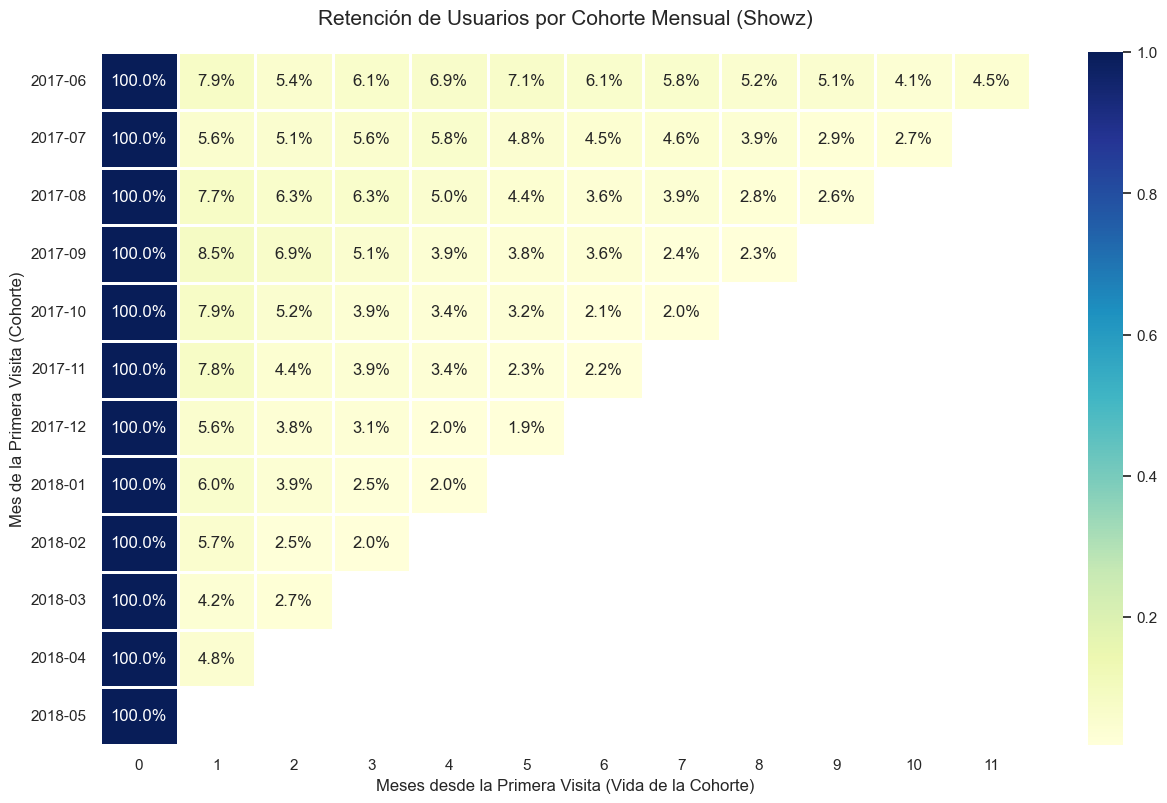

In [57]:
# Graficando con el nombre correcto de la variable
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Retención de Usuarios por Cohorte Mensual (Showz)', fontsize=15, pad=20)

sns.heatmap(
    retention_pivot,
    annot=True, 
    fmt='.1%', 
    linewidths=1, 
    linecolor='white',
    cmap='YlGnBu'      # Paleta de colores profesional (amarillo-verde-azul)
)

plt.xlabel('Meses desde la Primera Visita (Vida de la Cohorte)', fontsize=12)
plt.ylabel('Mes de la Primera Visita (Cohorte)', fontsize=12)
plt.yticks(rotation=0, fontsize=11)
plt.show()

*Observación* 

La matriz de retención mensual muestra la proporción de usuarios de cada cohorte de primera visita que regresaron al servicio en los meses subsiguientes. En general, observamos una caída significativa en la retención después del primer mes (vida de la cohorte 0), lo cual es un patrón común en muchos servicios online. Las cohortes de 2017 exhiben un comportamiento de retención más prolongado, con algunas cohortes regresando hasta 9-10 meses después de su primera visita, aunque con tasas bajas. Sin embargo, las cohortes de 2018 muestran una retención mucho más corta, con la mayoría de los valores "NaN" (no aplica o cero retención) apareciendo rápidamente después de los primeros 2 o 3 meses. Esto sugiere que los usuarios adquiridos a partir de 2018 tienen una menor propensión a regresar en comparación con las cohortes del año anterior.

## 🛍️ 2.2 Análisis de Ventas y Conversión
Analizamos el embudo de ventas: ¿Cuánto tiempo tarda un usuario en realizar su primera compra? Esto nos permite identificar fricciones en el proceso de conversión.


Se obtendra fechas de primera visita y de primera compra, posteriormente se uniran los datasets obtenidos y se categorizara con nomenclatura 0d,1d, ... para proceder a visualizar datos obtenidos.

In [58]:
# Obteniendo primeras compras de cada usuario
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'

# Dataframe con usuarios unicos con su primera visita
users_first_visit = visits.groupby('uid')['first_visit_date'].min().reset_index()

# Uniendo primera fecha de compra con primera fecha de visita
users_conversion_data = users_first_visit.merge(first_order_date,on='uid',how= 'left')

# Calcular tiempo hasta la primera compra (en días)
users_conversion_data['time_to_first_purchase'] = (users_conversion_data['first_order_date'] - users_conversion_data['first_visit_date']).dt.days

# Estadísticas de distribución de tiempo obtenido
print('\nDistribución del tiempo hasta la primera compra (en días):')
print(users_conversion_data['time_to_first_purchase'].describe())


Distribución del tiempo hasta la primera compra (en días):
count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: time_to_first_purchase, dtype: float64


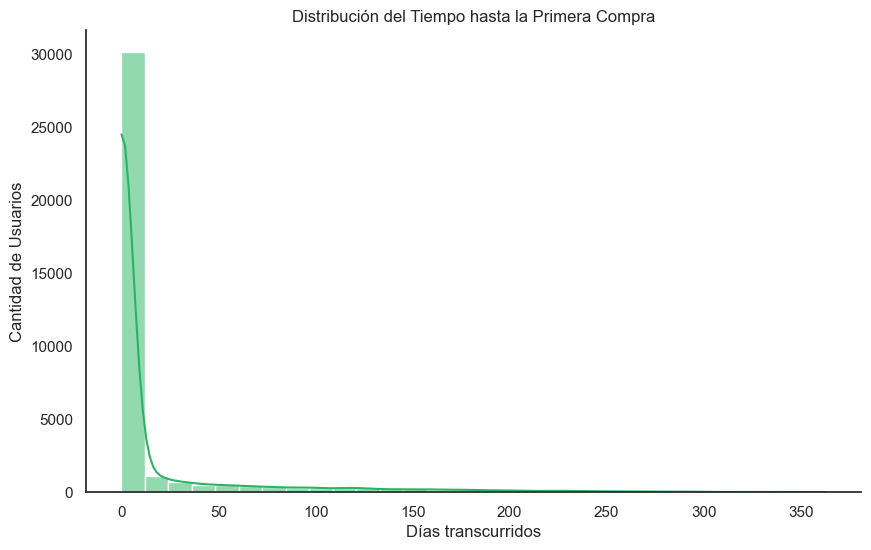


Conteo de usuarios por categoría de conversión:
conversion_bin
0d       0.721819
1-7d     0.084330
3-12m    0.071955
1-3m     0.062262
8-30d    0.059634
>12m     0.000000
Name: proportion, dtype: float64


In [59]:
# Gráfico: Tiempo hasta la primera compra
plt.figure(figsize=(10, 6))
sns.histplot(users_conversion_data['time_to_first_purchase'].dropna(), bins=30, kde=True, color='#28B463')
plt.title('Distribución del Tiempo hasta la Primera Compra')
plt.xlabel('Días transcurridos')
plt.ylabel('Cantidad de Usuarios')
sns.despine()
plt.show()

# Columna categórica agrupando rangos
bins = [-1,0,7,30,90,365,np.inf]
labels = ['0d','1-7d','8-30d','1-3m','3-12m','>12m']
users_conversion_data['conversion_bin'] = pd.cut(users_conversion_data['time_to_first_purchase'], bins=bins, labels=labels, right=True)

print('\nConteo de usuarios por categoría de conversión:')
print(users_conversion_data['conversion_bin'].value_counts(normalize=True))

*Observación*

La distribución del tiempo hasta la primera compra es un indicador crítico del comportamiento de nuestros usuarios. Los datos muestran claramente que la vasta mayoría de los usuarios (72.2%) realiza su primera compra el mismo día de su primera visita (categoría "0d").

Después de este pico inicial, la tasa de conversión disminuye rápidamente. Un 8.4% de los usuarios convierte entre 1 y 7 días, y un 6.0% lo hace entre 8 y 30 días. Es notable que un 6.2% de los usuarios tarda entre 1 y 3 meses, y un 7.2% entre 3 y 12 meses en realizar su primera compra. Sin embargo, la conversión después de un año (>12m) es inexistente, lo que subraya la necesidad de captar el interés del usuario en las etapas tempranas de su ciclo de vida.

Esta información es fundamental para los equipos de marketing, ya que indica que nuestras campañas y el funnel de conversión son más efectivos para impulsar compras inmediatas. Debemos evaluar si es viable o rentable implementar estrategias de retargeting para los segmentos que no compran de inmediato, pero que aún muestran potencial de conversión en los meses siguientes.

#### *Cantidad de pedidos durante un período dado* ####

Para entender mejor el comportamiento de compra de los usuarios, analizaremos la cantidad de pedidos que realizan durante un período de tiempo dado. Esto nos ayudará a identificar tendencias de actividad y volumen de transacciones en Showz.

In [60]:
# Extraer el mes de compra
orders['buy_month'] = orders['buy_ts'].dt.to_period('M')

# Número total de pedidos
total_orders_count = len(orders)
print(f'Número total de pedidos en todo el período: {total_orders_count:,}\n')

# Agrupando pedidos por mes de compra
orders_by_month = orders.groupby('buy_month').size()
print('Cantidad de pedidos por mes: ')
print(orders_by_month)

# Agrupando pedidos por día de la semana
orders['buy_dayofweek'] = orders['buy_ts'].dt.day_name()
orders_by_dayofweek =orders.groupby('buy_dayofweek').size().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
print('\nCantidad de pedidos por día de la semana:')
print(orders_by_dayofweek)


Número total de pedidos en todo el período: 50,415

Cantidad de pedidos por mes: 
buy_month
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, dtype: int64

Cantidad de pedidos por día de la semana:
buy_dayofweek
Monday       7498
Tuesday      7528
Wednesday    7494
Thursday     8372
Friday       8135
Saturday     5900
Sunday       5488
dtype: int64


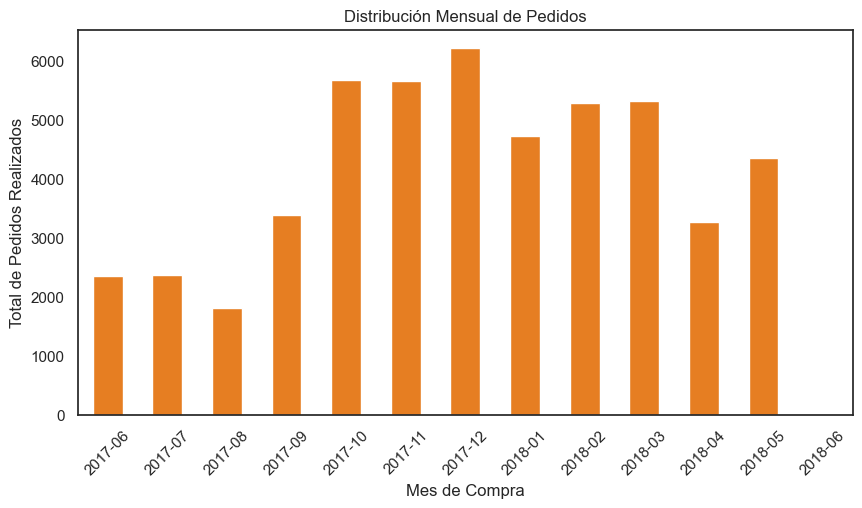

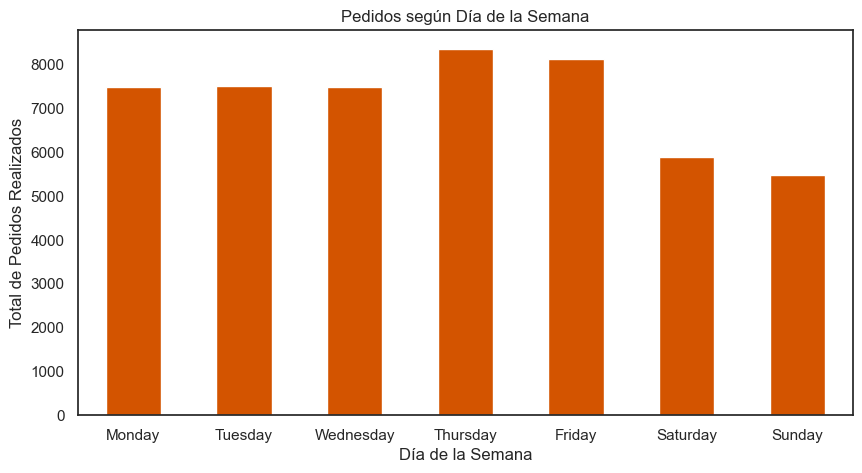

In [61]:
# Gráfico: Pedidos por Mes
plt.figure(figsize=(10, 5))
orders_by_month.plot(kind='bar', color='#E67E22')
plt.title('Distribución Mensual de Pedidos')
plt.xlabel('Mes de Compra')
plt.ylabel('Total de Pedidos Realizados')
plt.xticks(rotation=45)
plt.show()

# Gráfico: Pedidos por Día de la Semana
plt.figure(figsize=(10, 5))
orders_by_dayofweek.plot(kind='bar', color='#D35400')
plt.title('Pedidos según Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Pedidos Realizados')
plt.xticks(rotation=0)
plt.show()


*Observación*

El análisis del volumen de pedidos de Showz revela patrones claros tanto a nivel mensual como semanal, información crucial para optimizar las operaciones y estrategias de marketing.

Se registraron un total de 50,415 pedidos en todo el período analizado.

- **Tendencias Mensuales**: La cantidad de pedidos por mes muestra una clara estacionalidad y crecimiento. Observamos un incremento constante en el volumen de pedidos desde junio de 2017, con un notable pico hacia finales de 2017 e inicios de 2018 (octubre, noviembre, diciembre y marzo). Esto sugiere periodos de alta demanda, posiblemente impulsados por festividades, eventos clave o campañas de marketing intensivas en esas épocas. La marcada caída en abril de 2018 y la casi nula actividad en junio de 2018 (con solo 1 pedido) indican un final abrupto en los datos para ese año, lo cual debe ser considerado al interpretar las tendencias más recientes.

- **Patrones Semanales**: En cuanto a la cantidad de pedidos por día de la semana, la actividad transaccional es consistentemente alta de lunes a viernes, con los jueves y viernes registrando el mayor volumen de pedidos. Esto es un indicativo de que los usuarios tienden a comprar entradas durante la semana laboral. Por otro lado, los fines de semana (sábado y domingo) muestran una disminución notable en el volumen de pedidos, lo que sugiere un cambio en el comportamiento del consumidor o una menor urgencia para la compra de entradas durante esos días.

*Aspecto a destacar*

Estos patrones resaltan la necesidad de alinear los esfuerzos de marketing y la gestión de la oferta con estos picos de demanda. La alta actividad entre semana y el pico de fin de año/inicio de año nuevo presentan oportunidades clave para capitalizar el interés de los usuarios. Asimismo, la baja actividad los fines de semana podría indicar una oportunidad para explorar estrategias que incentiven la compra en esos días o reasignar recursos de marketing a los días de mayor efectividad.

#### *Tamaño promedio de compra* ####

##### Volumen de pedidos ######
Para una comprensión completa del "tamaño de la compra", analizamos dos dimensiones clave: el volumen de pedidos y el valor monetario promedio por pedido (revenue). Esto nos permite identificar patrones en la frecuencia de compra y el gasto asociado, proporcionando una visión integral del comportamiento transaccional en Showz.

In [62]:
# Contando total de pedidos y usuarios unicos por mes
monthly_order_summary = orders.groupby('buy_month').agg(total_orders=('buy_ts','size'),unique_users=('uid','nunique')).reset_index()

# Calculando el promedio de pedidos por usuario para cada mes
monthly_order_summary['avg_orders_per_user'] = monthly_order_summary['total_orders'] / monthly_order_summary['unique_users']
print('Cantidad PROMEDIO de pedidos por USUARIO por Mes')
print(monthly_order_summary[['buy_month','avg_orders_per_user']])

Cantidad PROMEDIO de pedidos por USUARIO por Mes
   buy_month  avg_orders_per_user
0    2017-06             1.163618
1    2017-07             1.191028
2    2017-08             1.227582
3    2017-09             1.231636
4    2017-10             1.214759
5    2017-11             1.244557
6    2017-12             1.258195
7    2018-01             1.211134
8    2018-02             1.240254
9    2018-03             1.273858
10   2018-04             1.192784
11   2018-05             1.226298
12   2018-06             1.000000


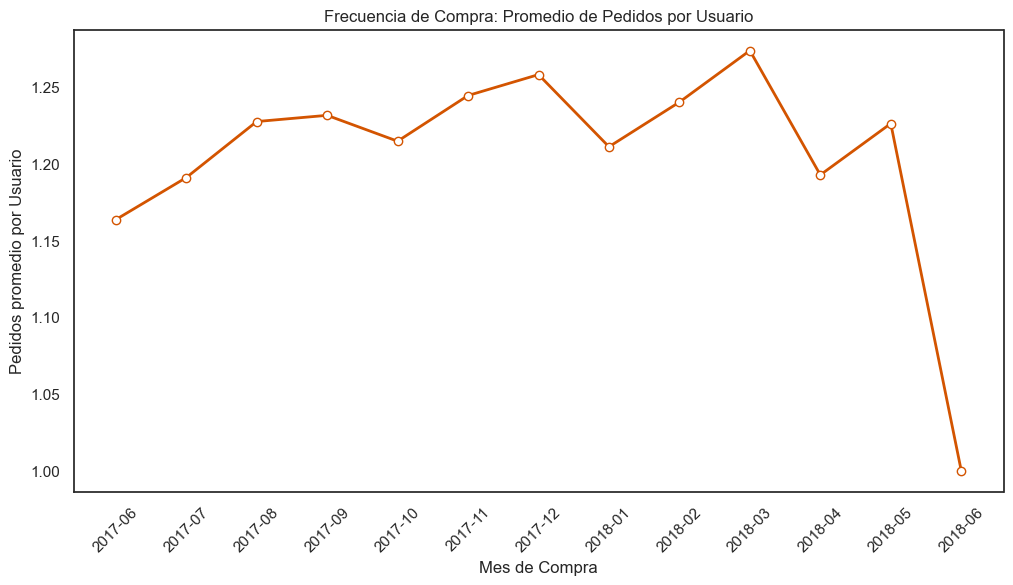

In [63]:
# Gráfico: Promedio de Pedidos Mensual por Usuario
plt.figure(figsize=(12, 6))
plt.plot(monthly_order_summary['buy_month'].astype(str), monthly_order_summary['avg_orders_per_user'], 
         marker='o', color='#D35400', linewidth=2, markerfacecolor='white')
plt.title('Frecuencia de Compra: Promedio de Pedidos por Usuario')
plt.xlabel('Mes de Compra')
plt.ylabel('Pedidos promedio por Usuario')
plt.xticks(rotation=45)
plt.show()

*Observación*

El análisis del promedio de pedidos por usuario por mes revela una interesante consistencia en la frecuencia de compra de los clientes de Showz. A lo largo del período, este promedio se mantiene generalmente entre 1.16 y 1.27 pedidos por usuario al mes, lo que indica que una parte significativa de nuestra base de usuarios realiza más de una compra dentro del mismo mes. Las ligeras variaciones observadas, como los picos hacia finales de 2017 y principios de 2018 (noviembre, diciembre y marzo), sugieren que en meses de mayor actividad o con eventos relevantes, los usuarios no solo aumentan en número, sino que también tienden a comprar con un poco más de frecuencia. Mantener o incrementar este promedio es crucial, ya que impulsar la recurrencia de compra es a menudo más costo-efectivo que adquirir nuevos clientes, lo que resalta la importancia de las estrategias de retención y fidelización.

In [64]:
# Contando total de pedidos y usuarios únicos por día de la semana
daily_order_summary = orders.groupby('buy_dayofweek').agg(total_orders=('buy_ts','size'),unique_users=('uid','nunique')).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

# Calculando el promedio de pedidos por usuario para cada día de la semana
daily_order_summary['avg_order_per_user']=daily_order_summary['total_orders'] / daily_order_summary['unique_users']
print(daily_order_summary[['buy_dayofweek','avg_order_per_user']])

  buy_dayofweek  avg_order_per_user
0        Monday            1.186580
1       Tuesday            1.190386
2     Wednesday            1.178487
3      Thursday            1.173206
4        Friday            1.174390
5      Saturday            1.161189
6        Sunday            1.171148


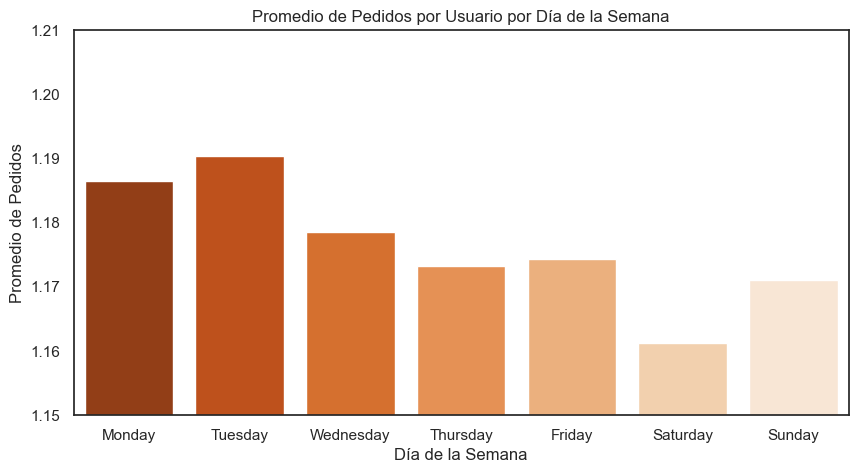

In [65]:
# Gráfico: Promedio de Pedidos por Día de Semana
plt.figure(figsize=(10, 5))
sns.barplot(
    x='buy_dayofweek', 
    y='avg_order_per_user', 
    data=daily_order_summary, 
    palette='Oranges_r',
    hue='buy_dayofweek',
    legend=False
)
plt.title('Promedio de Pedidos por Usuario por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Pedidos')
plt.ylim(1.15, 1.21) 

plt.show()

*Observación*

El análisis de la cantidad promedio de pedidos por usuario por día de la semana muestra una notable consistencia en la frecuencia de compra individual, con valores que oscilan entre 1.16 y 1.19 pedidos por usuario, independientemente del día. Esto sugiere que, si bien el volumen total de pedidos varía significativamente entre semana y fin de semana (con mayor volumen de lunes a viernes), la propensión de un usuario individual a realizar múltiples compras en un mismo día se mantiene relativamente estable en toda la semana. Es decir, los picos de pedidos a mitad de semana se deben más a un mayor número de usuarios activos que a que los usuarios existentes estén comprando con más frecuencia en esos días. Este patrón es valioso para planificar la capacidad y los esfuerzos de marketing, ya que indica que la oportunidad de impulsar la recurrencia en un mismo día no está fuertemente ligada a un día específico de la semana.

##### Valor monetario por pedido #####

In [66]:
# Valor promedio de compra por pedido (general)
avg_purchase_value = orders['revenue'].mean()
print(f"Valor monetario promedio por pedido (general): ${avg_purchase_value:.2f}\n")

# Valor promedio de compra por mes
avg_revenue_by_month = orders.groupby('buy_month')['revenue'].mean()
print('Valor monetario promedio por pedido por mes:\n')
print(avg_revenue_by_month)

# Valor promedio de compras por día de la semana
avg_revenue_by_dayofweek = orders.groupby('buy_dayofweek')['revenue'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
print("\n Valor monetario promedio por pedido por día de la semana:")
print(avg_revenue_by_dayofweek)

Valor monetario promedio por pedido (general): $5.00

Valor monetario promedio por pedido por mes:

buy_month
2017-06    4.060106
2017-07    5.306589
2017-08    4.847139
2017-09    5.416448
2017-10    4.928280
2017-11    4.783518
2017-12    5.852139
2018-01    4.112927
2018-02    4.840095
2018-03    5.413930
2018-04    5.150645
2018-05    4.771279
2018-06    3.420000
Freq: M, Name: revenue, dtype: float64

 Valor monetario promedio por pedido por día de la semana:
buy_dayofweek
Monday       4.960603
Tuesday      4.900476
Wednesday    4.953106
Thursday     5.294640
Friday       4.823605
Saturday     4.540310
Sunday       5.557334
Name: revenue, dtype: float64


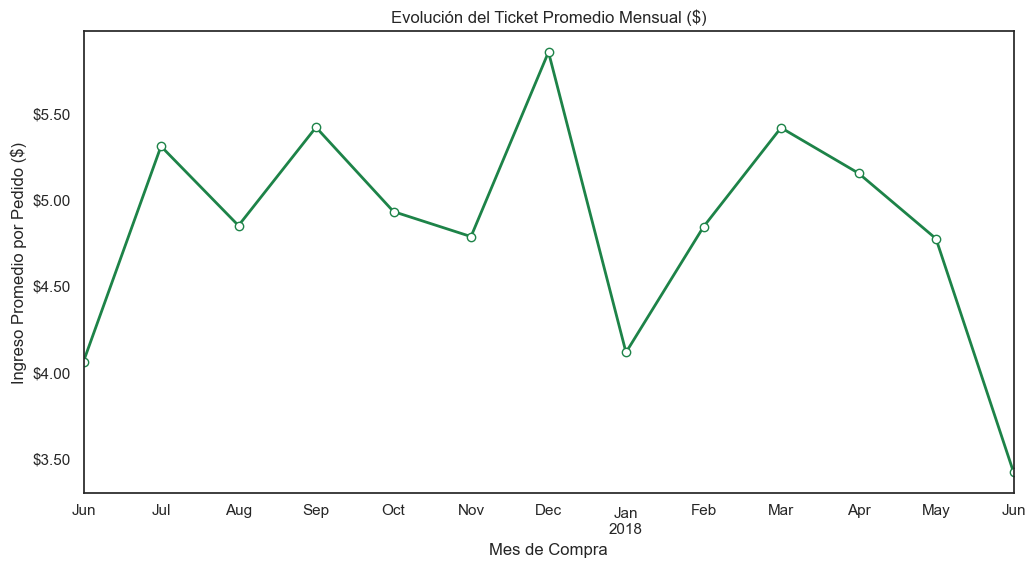

In [67]:
# Gráfico: Ticket Promedio Mensual
plt.figure(figsize=(12, 6))
avg_revenue_by_month.plot(kind='line', marker='o', color='#1D8348', linewidth=2, markerfacecolor='white')
plt.title('Evolución del Ticket Promedio Mensual ($)')
plt.xlabel('Mes de Compra')
plt.ylabel('Ingreso Promedio por Pedido ($)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.show()

*Observación*

El análisis del valor monetario promedio por pedido por mes muestra una fluctuación en la rentabilidad de cada transacción individual a lo largo del tiempo. Si bien la mayoría de los meses mantienen un promedio de revenue por pedido entre 4.00 y 5.50, se observan picos notables en julio de 2017 (5.31), septiembre de 2017 (5.42), diciembre de 2017 (5.85) y marzo de 2018 (5.41). Estos periodos de mayor valor por pedido podrían estar asociados con eventos de alto perfil, temporadas promocionales, o una mayor inclinación de los clientes a adquirir productos o entradas de mayor precio. Por otro lado, la disminución a $3.42 en junio de 2018, aunque sea un valor aislado, sugiere una posible variación en la oferta o la demanda hacia el final del período de datos. Monitorear estas tendencias es crucial para ajustar estrategias de precios, ofertas de productos y campañas de marketing que maximicen el ingreso por cada venta.

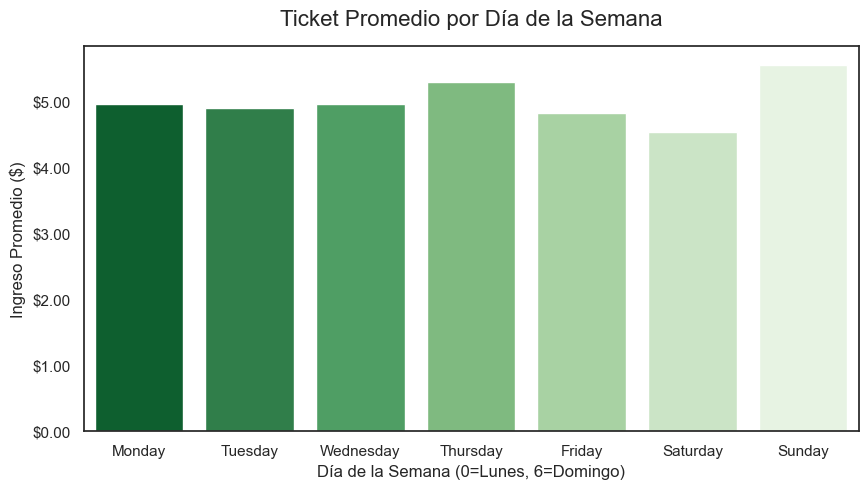

In [80]:
# Gráfico: Revenue por Día de la Semana
plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_revenue_by_dayofweek.index, 
    y=avg_revenue_by_dayofweek.values, 
    palette='Greens_r',
    hue=avg_revenue_by_dayofweek.index,
    legend=False
)
plt.title('Ticket Promedio por Día de la Semana', fontsize=16, pad=15)
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Ingreso Promedio ($)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.show()

*Observación*

El análisis del valor monetario promedio por pedido por día de la semana revela patrones interesantes en el gasto de nuestros clientes. Observamos que los domingos (5.56) y jueves (5.29) son los días con el valor promedio más alto por transacción, indicando que los clientes tienden a realizar compras de mayor costo en estos días. Por el contrario, los sábados (4.54) y viernes (4.82) muestran un valor promedio ligeramente inferior. Esta información es crucial para optimizar las estrategias de precios y promociones; por ejemplo, se podría considerar ofrecer artículos de mayor valor o paquetes premium los domingos y jueves, mientras que los fines de semana podrían enfocarse en promociones de volumen para compensar el menor valor unitario.

## 💰 2.3 Marketing Analytics: LTV, CAC y Rentabilidad
Esta es la sección core del negocio. Aplicamos **Análisis de Cohortes** para medir el Lifetime Value (LTV) y lo comparamos con el Costo de Adquisición (CAC) para determinar el Retorno de Inversión (ROMI).

In [69]:
# Uniendo pedidos con el mes de la primera visita del usuario (cohorte)
# Obtener el mes de la primera visita y el uid de los usuarios unicos
visits['first_visit_month_period'] = visits['first_visit_date'].dt.to_period('M')
user_first_visit_month = visits[['uid','first_visit_month_period']].drop_duplicates()

# Unir información con dataframe de pedidos
orders_with_cohort_info = orders.merge(user_first_visit_month, on='uid', how='left')

# Calcular ingreso total por cohorte de primera visita y mes de compra
revenue_by_cohort_month = orders_with_cohort_info.groupby(['first_visit_month_period','buy_month']).agg(revenue = ('revenue','sum')).reset_index()

# Calculando cohort_lifetime
revenue_by_cohort_month['cohort_lifetime'] = (revenue_by_cohort_month['buy_month'] - revenue_by_cohort_month['first_visit_month_period']).apply(lambda x: x.n if hasattr(x, 'n') else x.days / 30.4375).astype(int)

# Tabla dinámica con ingresos por cohorte y meses de vida
ltv_pivot = revenue_by_cohort_month.pivot_table(
    index = 'first_visit_month_period',
    columns = 'cohort_lifetime',
    values = 'revenue',
    aggfunc = 'sum'
)

# Obteniendo número de usuarios en cada cohorte
cohort_users_for_ltv = visits.groupby('first_visit_month_period')['uid'].nunique()

# Dividiendo ingresos acumulados por el número de usuarios en cada cohorte
ltv_matrix = ltv_pivot.divide(cohort_users_for_ltv, axis=0)

# Calculando LTV acumulado
ltv_cumulative = ltv_matrix.cumsum(axis =1)
print('\nLTV acumulado por cohorte y meses de vida')
print(ltv_cumulative)


LTV acumulado por cohorte y meses de vida
cohort_lifetime                 0         1         2         3         4   \
first_visit_month_period                                                     
2017-06                   0.720830  0.921794  1.032262  1.325051  1.622252   
2017-07                   0.751514  0.832129  0.916520  0.991326  1.055785   
2017-08                   0.612397  0.710356  0.808710  0.901649  0.981213   
2017-09                   0.739775  0.961307  1.087662  1.712598  1.789734   
2017-10                   0.706868  0.853530  0.904614  0.945345  0.985514   
2017-11                   0.606716  0.704616  0.753898  0.804160  0.844851   
2017-12                   0.667128  0.735952  0.902103  1.104882  1.162566   
2018-01                   0.468397  0.554664  0.606147  0.619667  0.642982   
2018-02                   0.518657  0.608059  0.637937  0.678528       NaN   
2018-03                   0.583389  0.631181  0.668812       NaN       NaN   
2018-04              

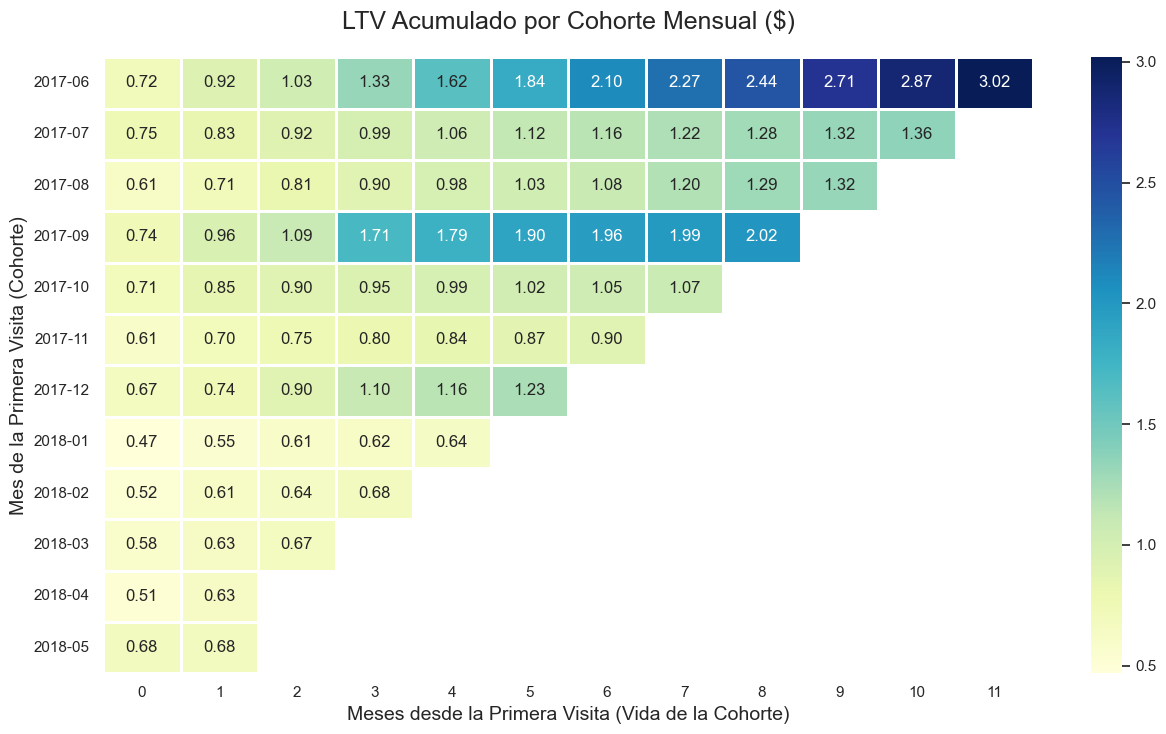

<Figure size 1200x700 with 0 Axes>

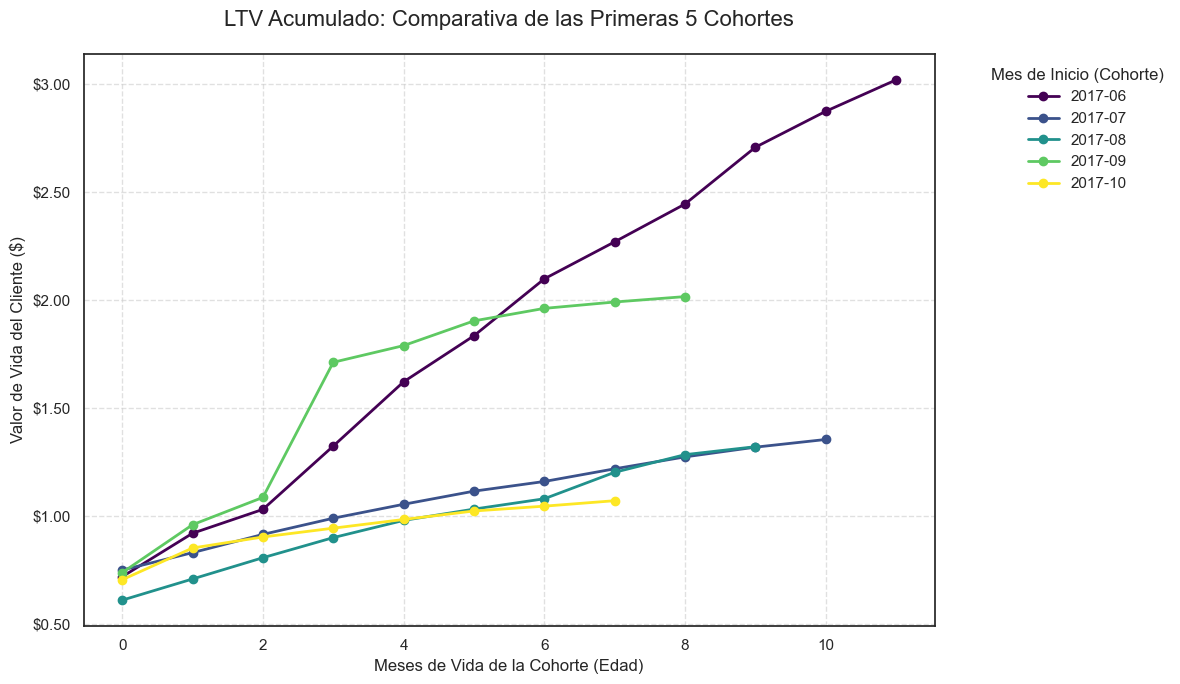

In [70]:
# Grafico de LTV acumulado
plt.figure(figsize=(15,8))
sns.heatmap(
    ltv_cumulative,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu", 
    linewidths=1, 
    linecolor='white' 
)
plt.title('LTV Acumulado por Cohorte Mensual ($)', fontsize=18, pad=20)
plt.xlabel('Meses desde la Primera Visita (Vida de la Cohorte)', fontsize=14)
plt.ylabel('Mes de la Primera Visita (Cohorte)', fontsize=14)
plt.yticks(rotation=0, fontsize=11)
plt.show()

# Gráfico: LTV Acumulado de las Primeras 5 Cohortes
plt.figure(figsize=(12, 7))
ax = ltv_cumulative.iloc[:5].T.plot(figsize=(12, 7), marker='o', colormap='viridis', linewidth=2)
plt.title('LTV Acumulado: Comparativa de las Primeras 5 Cohortes', fontsize=16, pad=20)
plt.xlabel('Meses de Vida de la Cohorte (Edad)')
plt.ylabel('Valor de Vida del Cliente ($)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Mes de Inicio (Cohorte)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


*Observación:

- **LTV Acumulado por Cohorte Mensual (Mapa de Calor)**: Este mapa de calor ilustra claramente cómo el valor generado por los usuarios (LTV) se acumula con el tiempo desde su primera visita, revelando que las cohortes de junio y septiembre de 2017 son consistentemente las de mayor rendimiento y longevidad, con la cohorte de junio alcanzando un valor acumulado superior a $3 en su undécimo mes, lo que sugiere la necesidad de investigar los factores clave de éxito de esos períodos de adquisición para replicarlos en futuras estrategias.

- **LTV Acumulado de las Primeras Cohortes (Gráfico de Líneas)**: El gráfico de líneas complementa el heatmap al mostrar la trayectoria individual del LTV de las cohortes iniciales, confirmando que la cohorte de junio de 2017 lidera en la acumulación de valor a lo largo del tiempo, mientras que la de septiembre de 2017 exhibe una destacada y rápida acumulación inicial, lo que enfatiza la importancia de una fuerte activación y engagement en los primeros meses de vida de una cohorte para maximizar su valor a largo plazo.

### 2.2 Informe de Ventas ###

#### *Dinero invertido* ####

In [71]:
# Generando columnas para futuras operaciones
costs['month'] = costs['dt'].dt.to_period('M')
# Se ocuparan buy_month de orders y first_visit_month_period de visits


# Gasto total
total_marketing_spend = costs['costs'].sum()
print(f'1.Gasto Total de Marketing: $ {total_marketing_spend:,.2f}\n')

# Gasto por fuente de adquisición
spend_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print('Gasto por fuente de adquisición: \n', spend_by_source)


# Gasto de marketing por mes
spend_over_time = costs.groupby('month')['costs'].sum()
print('\nGasto de Marketing por mes:\n', spend_over_time)

# Gasto mensual por fuente
spend_monthly_by_source = costs.groupby(['month', 'source_id'])['costs'].sum().unstack()
print("\nGasto de Marketing Mensual por Fuente:\n", spend_monthly_by_source.head())

1.Gasto Total de Marketing: $ 329,131.62

Gasto por fuente de adquisición: 
 source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

Gasto de Marketing por mes:
 month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64

Gasto de Marketing Mensual por Fuente:
 source_id       1        2         3        4        5       9       10
month                                                                  
2017-06    1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07    1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08     951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09    1502.01  2985.66   9963.55  5192.26  3849.14  41

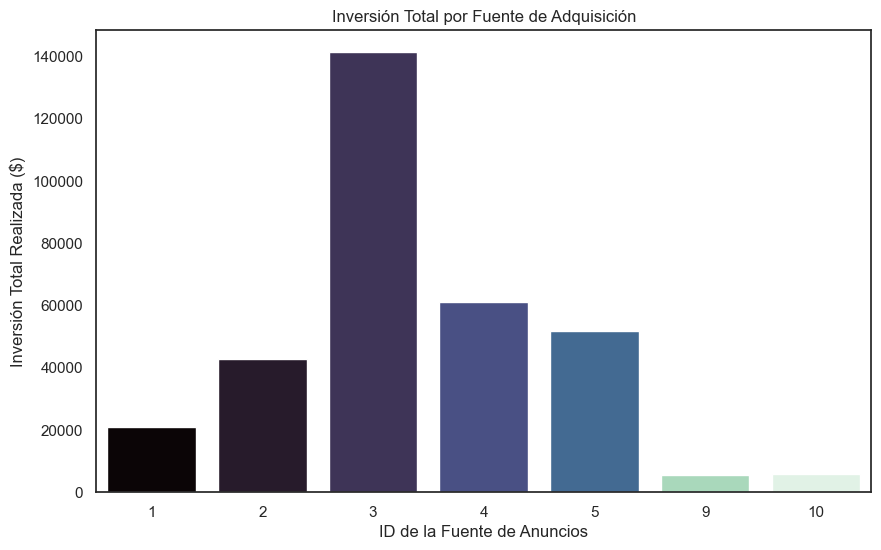

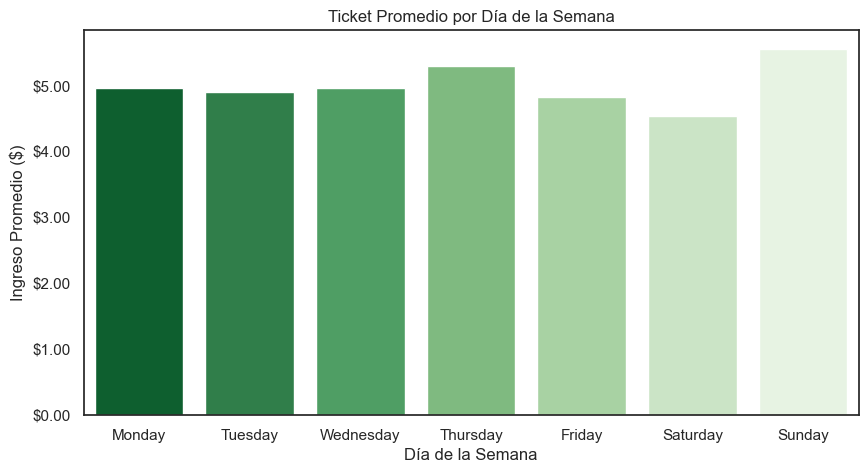

In [72]:
# Gráfico: Gasto por Fuente
plt.figure(figsize=(10, 6))
sns.barplot(
    x=spend_by_source.index, 
    y=spend_by_source.values, 
    palette='mako',
    hue=spend_by_source.index,
    legend=False
)
plt.title('Inversión Total por Fuente de Adquisición')
plt.xlabel('ID de la Fuente de Anuncios')
plt.ylabel('Inversión Total Realizada ($)')
plt.show()

# Gráfico: Revenue por Día de la Semana (Corregido)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_revenue_by_dayofweek.index, 
    y=avg_revenue_by_dayofweek.values, 
    palette='Greens_r',
    hue=avg_revenue_by_dayofweek.index,
    legend=False
)
plt.title('Ticket Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ingreso Promedio ($)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.show()

*Observación*

- **Gasto por Fuente de Adquisición**: El análisis del gasto por fuente revela que las source_id 3  y 4 son los canales de inversión más significativos, acumulando 141,321.63 y 61,073.60 respectivamente. Esta concentración sugiere una fuerte dependencia de estas plataformas, mientras que fuentes como la source_id 9 y 10 representan una porción marginal del presupuesto total.

- **Gasto de Marketing Mensual**: El gasto total de marketing muestra una tendencia al alza desde junio de 2017, alcanzando su pico entre octubre y diciembre de 2017 con inversiones superiores a los 36,000 mensuales, y una posterior estabilización alrededor de los 22,000 en los últimos meses observados (abril y mayo de 2018), lo que podría indicar cambios estacionales en la estrategia o la disponibilidad de presupuesto.

- **Gasto de Marketing Mensual por Fuente**: La distribución mensual del gasto por fuente reitera que la source_id 3 es consistentemente la de mayor inversión, mostrando un aumento progresivo desde junio de 2017 hasta un pico en octubre de 2017 (15,737.24), y que la source_id 4 le sigue en volumen, mientras que el resto de las fuentes mantienen niveles de gasto significativamente menores y más estables a lo largo del período.

#### *Costo de adquisición de clientes(CAC) de cada una de las fuentes* ####

In [73]:
# Identificar mes y fuente de primera visita de cada usuario
first_visits_marketing = visits.groupby('uid').agg(
    first_visit_month_period = ('first_visit_month_period','min'),
    acquisition_source_id = ('source_id','first')
).reset_index()

# Contando usuarios adquiridos por mes y por fuente
new_users_by_month_source = first_visits_marketing.groupby(['first_visit_month_period','acquisition_source_id']).agg(new_users = ('uid','nunique')).reset_index()

# Sumar costos de marketing por mes y por fuente
costs_monthly_source = costs.groupby(['month','source_id']).agg(total_cost=('costs','sum')).reset_index()

# Uniendo nuevos usuarios con costos
cac_data = pd.merge(new_users_by_month_source,costs_monthly_source,
                    left_on=['first_visit_month_period','acquisition_source_id'],
                    right_on=['month','source_id'],
                    how='left')

# Rellenando costos NaN (si fuente tuvo usuarios pero no costos registrados)
cac_data['total_cost'] = cac_data['total_cost'].fillna(0)

# Calculando CAC
cac_data['cac'] = cac_data['total_cost'] / cac_data['new_users']

# Agrupando CAC promedio por fuente
avg_cac_by_source = cac_data.groupby('acquisition_source_id')['cac'].mean().sort_values(ascending=False)
print("\nCosto Promedio de Adquisición de Clientes (CAC) por Fuente:\n", avg_cac_by_source)

# CAC a lo largo del tiempo
cac_by_month_source = cac_data.pivot_table(index='first_visit_month_period', columns='acquisition_source_id', values='cac')
print(cac_by_month_source)


Costo Promedio de Adquisición de Clientes (CAC) por Fuente:
 acquisition_source_id
3     2.256561
2     2.191292
1     1.769774
5     1.053672
10    0.922304
4     0.890443
9     0.856582
7     0.000000
6     0.000000
Name: cac, dtype: float64
acquisition_source_id           1         2         3         4         5   \
first_visit_month_period                                                     
2017-06                   1.475242  1.738811  2.018708  1.015545  0.968933   
2017-07                   1.545937  1.748958  2.212272  0.965462  0.919957   
2017-08                   2.016547  2.174130  2.210702  1.177657  0.804891   
2017-09                   1.748556  2.073375  2.118552  1.153323  0.908459   
2017-10                   1.827743  2.230663  2.287722  0.827428  0.895281   
2017-11                   1.658860  2.154220  2.163596  0.625153  1.199117   
2017-12                   1.760301  2.474886  2.287016  0.867654  1.208586   
2018-01                   2.045070  2.536754  2.31568

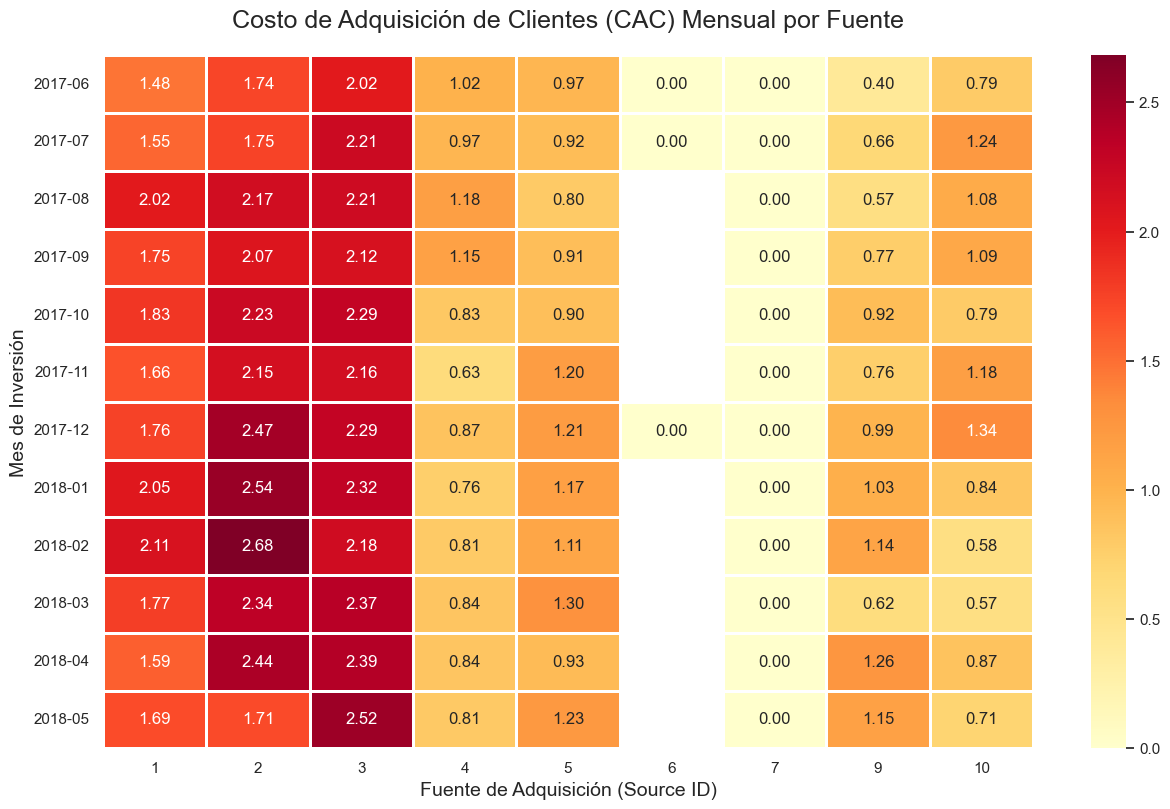

In [74]:
# Graficando CAC por Fuente
plt.figure(figsize=(15, 9))
plt.title('Costo de Adquisición de Clientes (CAC) Mensual por Fuente', fontsize=18, pad=20)

sns.heatmap(
    cac_by_month_source,
    annot=True,
    fmt='.2f',      # Dos decimales para moneda
    cmap="YlOrRd",
    linewidths=1,
    linecolor='white'
)

plt.xlabel('Fuente de Adquisición (Source ID)', fontsize=14)
plt.ylabel('Mes de Inversión', fontsize=14)
plt.yticks(rotation=0, fontsize=11)
plt.show()

*Observación*

- **Costo de Adquisición de Clientes (CAC) por Fuente**: El análisis del CAC promedio revela una variabilidad significativa entre las fuentes, siendo la source_id 9 (probablemente Twitter ads) la más eficiente con un CAC de 0.85, seguida por la source_id 4 (0.89) y la source_id 10 (0.92), lo que indica su mayor rentabilidad en la atracción de nuevos usuarios. Por otro lado, las source_id 3 (2.26), 2 (2.19) y 1 (1.77) presentan los CACs más elevados, sugiriendo que, aunque puedan generar volumen, su costo por cliente es considerablemente más alto, lo que requiere una evaluación de su eficiencia y calidad de adquisición. Las source_id 6 y 7 con CAC de 0.00 requieren investigación para confirmar si no hay costos asociados o si la atribución de usuarios es el problema.

- **CAC Mensual por Fuente**: El análisis mensual del CAC por fuente muestra fluctuaciones notables, con las fuentes 3, 2 y 1 manteniendo consistentemente los CACs más altos a lo largo de los meses, mientras que las fuentes 4, 5, 9 y 10 generalmente exhiben costos de adquisición más bajos y estables. Esta tendencia subraya la necesidad de monitorear la dinámica del CAC a lo largo del tiempo para cada canal, ajustando las estrategias de inversión para optimizar la eficiencia, especialmente en las fuentes con CACs volátiles o persistentemente altos.

#### *Rentabilidad de inversión (ROMI)* ####



In [75]:
# Unir relación de ingresos a la fuente de adquisición del usuario, haremos uso de first_visits_marketing
orders_with_acquisition_source = orders.merge(first_visits_marketing[['uid','acquisition_source_id']], on='uid',how='left')

# Agrupando ingresos por mes de compra y fuente de adquisición
revenue_by_month_source = orders_with_acquisition_source.groupby(['buy_month','acquisition_source_id']).agg(total_revenue=('revenue','sum')).reset_index()

# Unir ingresos con costos, usando costos_monthly_source utilizado en calculo de CAC
romi_analysis_data = pd.merge(revenue_by_month_source, costs_monthly_source, left_on=['buy_month','acquisition_source_id'],right_on=['month','source_id'], how='left')
# Rellenando costos e ingresos NaN con 0, para calculo de ROMI
romi_analysis_data['total_cost'] = romi_analysis_data['total_cost'].fillna(0)
romi_analysis_data['total_revenue'] = romi_analysis_data['total_revenue'].fillna(0)

#Calculando ROMI (Revenue - Cost)/Cost *100
romi_analysis_data['romi'] = romi_analysis_data.apply(
    lambda row: ((row['total_revenue'] - row['total_cost']) / row['total_cost'] * 100) if row['total_cost'] > 0 else np.nan,axis=1)

# ROMI promedio por fuente
avg_romi_by_source = romi_analysis_data.groupby('acquisition_source_id')['romi'].mean().sort_values(ascending=False)
print("Retorno promedio de la Inversión en Marketing (ROMI) por Fuente (%): \n", avg_romi_by_source)

# Ajuste de ROMI para visualización por mes
romi_by_month_source = romi_analysis_data.pivot_table(
    index = 'buy_month',
    columns = 'acquisition_source_id',
    values = 'romi'
)

print(romi_by_month_source)

Retorno promedio de la Inversión en Marketing (ROMI) por Fuente (%): 
 acquisition_source_id
1     86.100955
2     41.930961
9     30.206774
4    -15.354780
5    -20.881776
10   -28.478992
3    -68.685960
7           NaN
Name: romi, dtype: float64
acquisition_source_id          1           2          3          4   \
buy_month                                                             
2017-06                  3.805936  -36.072638 -68.095943 -41.969956   
2017-07                 85.016964   -9.546057 -68.988464 -10.569364   
2017-08                 31.522047  -28.740786 -72.145864 -47.212311   
2017-09                148.337228   23.347267 -66.054770 -37.211927   
2017-10                 62.889777   43.268524 -69.292646 -16.614649   
2017-11                 76.320568    9.738780 -68.437870  20.153021   
2017-12                 71.513326  201.816326 -65.713350 -18.427909   
2018-01                 49.223303   -3.016302 -74.746063 -25.133941   
2018-02                 46.778379   69.748

<Figure size 1400x800 with 0 Axes>

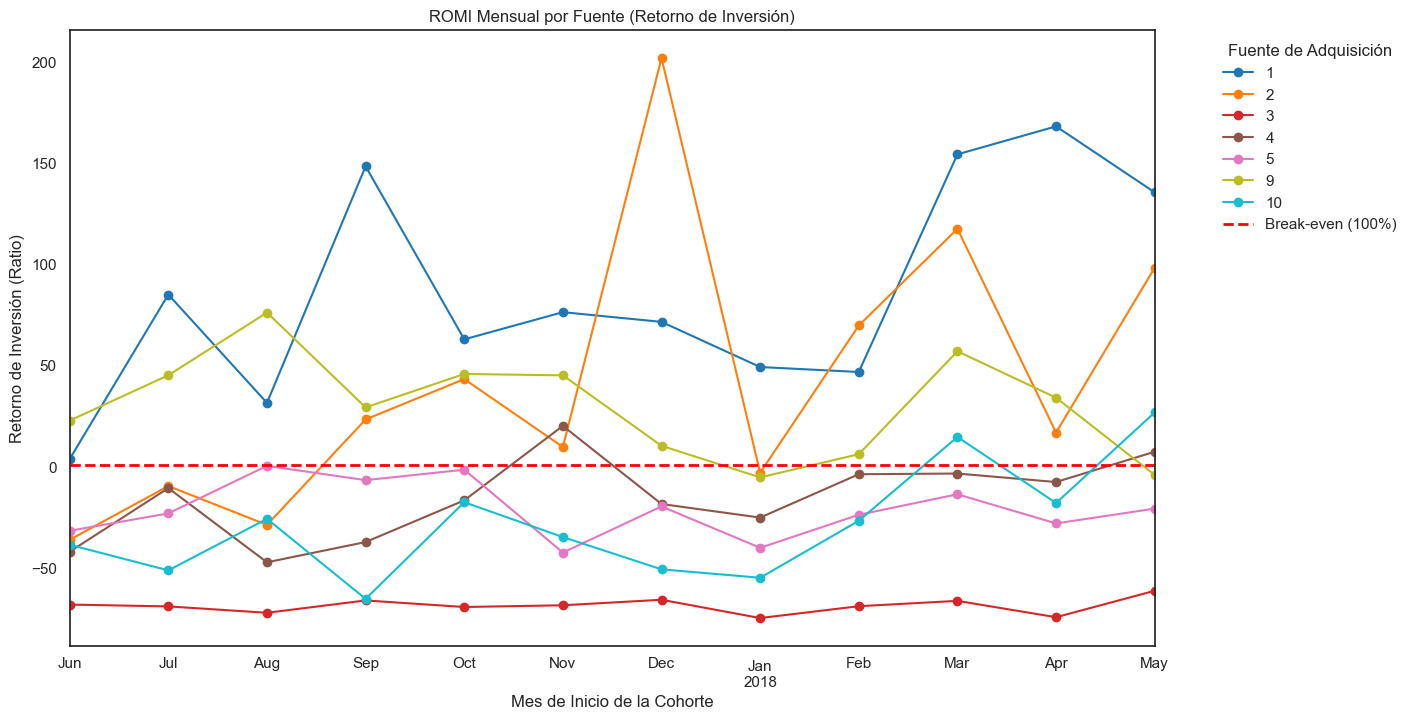

In [76]:
# Gráfico: ROMI
plt.figure(figsize=(14, 8))
romi_by_month_source.plot(kind='line', marker='o', figsize=(14, 8), colormap='tab10')
plt.axhline(1, color='red', linestyle='--', linewidth=2, label='Break-even (100%)')
plt.title('ROMI Mensual por Fuente (Retorno de Inversión)')
plt.xlabel('Mes de Inicio de la Cohorte')
plt.ylabel('Retorno de Inversión (Ratio)')
plt.legend(title='Fuente de Adquisición', bbox_to_anchor=(1.05, 1))
plt.show()

*Observación*

- **Retorno Promedio de la Inversión en Marketing (ROMI) por Fuente**: El análisis del ROMI promedio revela una clara distinción en la rentabilidad de las inversiones por fuente de adquisición. Las source_id 1 (86.10%) y 2 (41.93%) demuestran ser consistentemente las más rentables, generando un retorno positivo significativo sobre la inversión, lo que las convierte en candidatas clave para mayor asignación de presupuesto. Por el contrario, las fuentes 3, 4, 5, 9 y 10 exhiben un ROMI promedio negativo (alrededor de -15% a -68%), indicando que, en promedio, no están recuperando su costo de marketing. La source_id 7 con NaN sugiere falta de datos para el cálculo, lo cual requiere una revisión.

- **ROMI Mensual por Fuente**: La granularidad mensual del ROMI destaca una alta volatilidad entre las fuentes. Mientras que las source_id 1 y 2 muestran períodos de ROMI muy fuerte (superando el 100% en algunos meses para la source_id 2 en diciembre de 2017 y la source_id 1 en marzo-abril de 2018), las fuentes 3, 4, 5, 9 y 10 luchan por alcanzar la rentabilidad, con valores consistentemente negativos en la mayoría de los meses, a pesar de algunas excepciones positivas (ej., source_id 4 y 10 en mayo de 2018; source_id 9 con fluctuaciones positivas). Esto subraya la necesidad de una optimización continua y, potencialmente, una reevaluación

#### *Comportamiento por dispositivos* ####

In [77]:
print("\n Análisis de Métricas Clave por Dispositivo\n")

# Usuarios únicos por dispositivo
users_by_device = visits.groupby('device')['uid'].nunique()
print("Usuarios únicos por Dispositivo:\n", users_by_device)

#Ingresos por dispositivo
user_first_device = visits.groupby('uid')['device'].first().reset_index()
orders_with_device = orders.merge(user_first_device, on='uid', how='left')

revenue_by_device = orders_with_device.groupby('device')['revenue'].sum()
print("\nIngresos Totales por Dispositivo de la Primera Visita:\n", revenue_by_device)


 Análisis de Métricas Clave por Dispositivo

Usuarios únicos por Dispositivo:
 device
desktop    164523
touch       71345
Name: uid, dtype: int64

Ingresos Totales por Dispositivo de la Primera Visita:
 device
desktop    211531.81
touch       40525.39
Name: revenue, dtype: float64


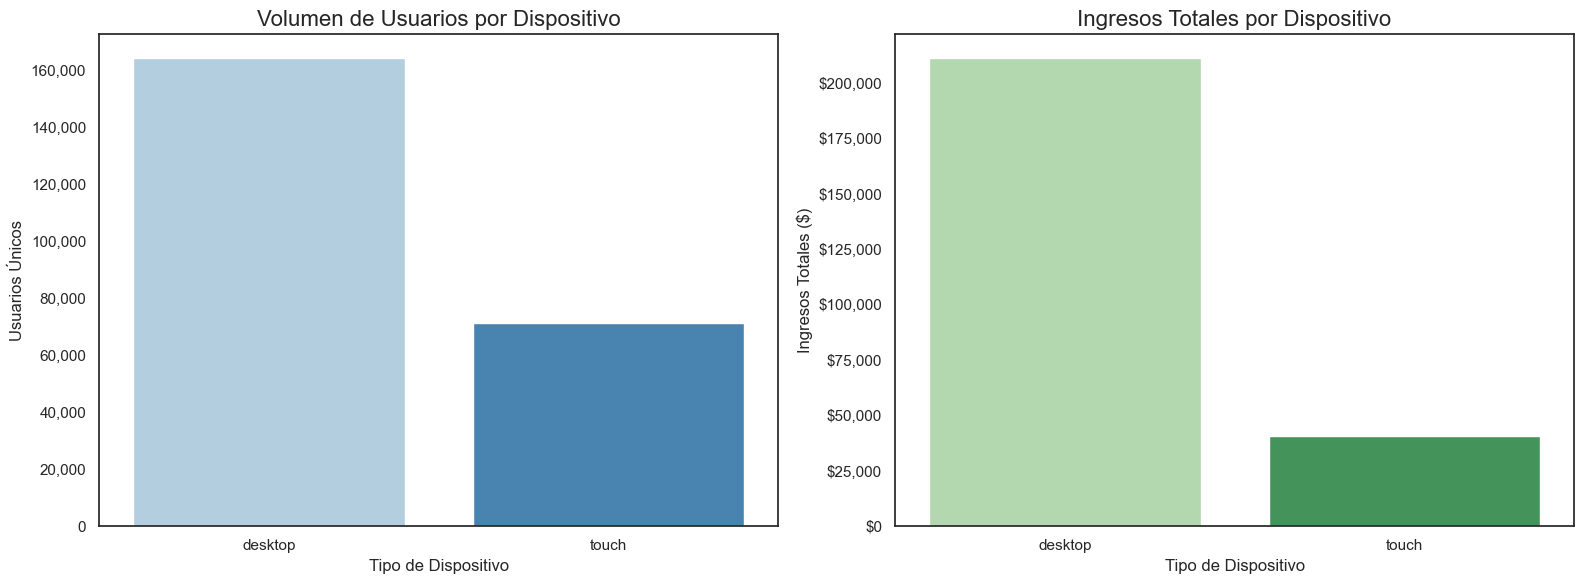

In [78]:
# Gráficos: Dispositivos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico: Usuarios por Dispositivo
sns.barplot(
    x=users_by_device.index, 
    y=users_by_device.values, 
    palette='Blues', 
    ax=ax1,
    hue=users_by_device.index,
    legend=False
)
ax1.set_title('Volumen de Usuarios por Dispositivo', fontsize=16)
ax1.set_xlabel('Tipo de Dispositivo')
ax1.set_ylabel('Usuarios Únicos')

# SEPARADOR DE MILES: línea clave para facilitar la lectura
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Gráfico: Ingresos por Dispositivo
sns.barplot(
    x=revenue_by_device.index, 
    y=revenue_by_device.values, 
    palette='Greens', 
    ax=ax2,
    hue=revenue_by_device.index,
    legend=False
)
ax2.set_title('Ingresos Totales por Dispositivo', fontsize=16)
ax2.set_xlabel('Tipo de Dispositivo')
ax2.set_ylabel('Ingresos Totales ($)')

# Formato de Moneda y separador de miles
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

*Observación*

El análisis de usuarios e ingresos por tipo de dispositivo de primera visita revela una clara predominancia del Desktop, que no solo atrae a la mayor parte de los usuarios únicos (aproximadamente 164,523 frente a 71,345 de Touch), sino que también es responsable de generar la vasta mayoría de los ingresos totales (211,531.81 vs. 40,525.39 de Touch). Estos datos sugieren que, si bien el canal Touch contribuye a la base de usuarios, las interacciones y transacciones de mayor valor monetario se originan principalmente desde dispositivos de escritorio, lo que es una consideración crítica para la optimización de la experiencia del usuario y la asignación de recursos de marketing y desarrollo de producto.

## Etapa 3. Conclusión de hallazgos ##

# 🏁 3. Conclusiones y Recomendaciones Estratégicas

## 📊 3.1 Diagnóstico de Salud Financiera (ROMI vs CAC)
Tras analizar el ecosistema de marketing de **Showz**, el hallazgo principal es que el éxito no reside en el volumen de adquisición (CAC bajo), sino en la **calidad del valor de vida del cliente (LTV)**.

| Canal (Source ID) | Eficiencia (CAC) | Rentabilidad (ROMI) | Estatus Crítico |
| :--- | :--- | :--- | :--- |
| **Source 1** | Alto | **+86.1%** | 🚀 Escalar Inversión |
| **Source 2** | Alto | **+41.9%** | ✅ Mantener / Optimizar |
| **Source 9 & 4** | **Excelente (Bajo)** | -5.3% a -15.3% | ⚠️ Revisar Calidad |
| **Source 3** | Pobre (Alto) | -68.0% | 🛑 Pausa Inmediata |

---

## 💡 3.2 Hallazgos Clave

* **La paradoja del CAC:** Las fuentes **9 y 4** son excelentes "atrayendo" gente (CAC < 0.90), pero esos usuarios no compran lo suficiente. Estamos adquiriendo "tráfico barato" que no convierte.
* **Fuentes de Alto Valor:** Las fuentes **1 y 2** son costosas de adquirir, pero son las únicas que realmente multiplican el dinero. Por cada $1 invertido en la Fuente 1, recibimos **$1.86**.
* **Fuga de Capital:** La **Fuente 3** es el punto más crítico; es donde más se gasta y donde menos se recupera (-68% de retorno).

---

## 🚀 3.3 Plan de Acción (Estrategia de Inversión)

### 🟢 A. Priorización y Escalabilidad (Sources 1 y 2)
* **Acción:** Incrementar el presupuesto en un 15% mensual en estos canales.
* **Justificación:** El alto LTV de estos usuarios compensa el costo inicial. Son la base de la rentabilidad del negocio.

### 🟡 B. Optimización de Embudo (Sources 9 y 4)
* **Acción:** No aumentar presupuesto. Iniciar experimentos de **A/B Testing** en el proceso de compra para estos usuarios.
* **Objetivo:** Si logramos subir su ticket promedio, su bajo CAC los convertirá en minas de oro.

### 🔴 C. Reasignación de Presupuesto (Sources 3, 5 y 10)
* **Acción:** Reducción drástica del gasto (mínimo 50%) y auditoría de campañas.
* **Destino:** Los fondos liberados deben redirigirse a la **Fuente 1** para maximizar el ROMI global.

---
**Nota Técnica:** Se detectó falta de datos en la **Fuente 7**, se recomienda una revisión de los tags de seguimiento para evitar puntos ciegos en la atribución.